<a href="https://colab.research.google.com/github/sanjit1995/SignsLanguage_MNIST/blob/master/SignsMNIST_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
from keras.utils import to_categorical
from keras.layers import Dropout, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, MaxPool2D
from keras.models import Model, load_model
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import keras.backend as K
from keras.models import model_from_json
from keras.models import Sequential
from keras import layers
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from keras.utils import to_categorical
import pandas as pd
import PIL.Image
import tensorflow as tf
import keras.backend as K
from keras.utils import to_categorical
from keras.models import Sequential
import pickle 

In [0]:
# load the model from disk
filename = '/content/drive/My Drive/Colab Notebooks/data/SignLanguageMNIST/signLanguage_modelCNN_diffApproach.pkl'
cModel = pickle.load(open(filename, 'rb'))

In [0]:
#loadata 
train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/SignLanguageMNIST/sign_mnist_train.csv')
train_label=train['label']
train=train.drop('label',1)
train=(np.array(train))
test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/SignLanguageMNIST/sign_mnist_test.csv')
test_label=test['label']
test=test.drop('label',1)
test=(np.array(test))

In [0]:
train

In [0]:
#one hot encoding of labels
def one_hot(labels):
    labels=pd.Series(labels)
    labels=pd.get_dummies(labels)
    return np.array(labels)

In [0]:
def remodel(vec):
    mat=[]
    for i in range(0,len(vec)):
        mat.append((vec[i]).reshape(28,28,1))
    return np.array(mat)

In [0]:
train_data,test_data,train_labels,test_labels=remodel(train),remodel(test),one_hot(train_label),one_hot(test_label)

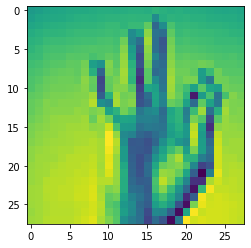

In [19]:
plt.imshow(test_data[388].reshape(28,28))#checking data

In [0]:
def train(input_shape):
    X_input = Input(input_shape)

    X = Conv2D(32, 2, activation='relu', input_shape=(28,28,1))(X_input)
    X = Conv2D(64, 2, activation='relu')(X)
    X = MaxPool2D(pool_size=(2, 2))(X)
    X = Dropout(0.25)(X)

    X = Conv2D(32, 2, activation='relu')(X)
    X = Conv2D(64, 2, activation='relu')(X)
    X = MaxPool2D(pool_size=(2, 2))(X)
    X = Dropout(0.25)(X)

    X = Conv2D(32, 2, activation='relu')(X)
    X = Conv2D(64, 2, activation='relu')(X)
    X = MaxPool2D(pool_size=(2, 2))(X)
    X = Dropout(0.25)(X)

    X = Flatten()(X)
    X = Dense(1024, activation='relu')(X)
    X = Dropout(0.5)(X)
    X = Dense(24, activation='softmax')(X)
    model = Model(inputs=X_input,outputs=X,name="custom_net")
    return model

In [0]:
def custom_net(input_shape):# Custom Model
    X_input = Input(input_shape)
    X = Conv2D(5, (3,3), strides = (5, 5), name = 'conv1')(X_input)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2),strides=(2,2),name='max_pool1')(X)
    X = Conv2D(10, (1,1), strides = (2, 2), name = 'conv2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2),strides=(1,1),name='max_pool2')(X)
    X = Flatten()(X)
    X = Dense(24, activation='softmax', name='fc')(X)
    model = Model(inputs=X_input,outputs=X,name="custom_net")
    return model

In [0]:
cModel=train(train_data.shape[1:])

In [0]:
cModel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [0]:
cModel.fit(x=train_data,y=train_labels,epochs=5, batch_size=100)

Functions for a purpose

In [0]:
test_data[0].shape

(28, 28, 1)

In [0]:
def checkValidity(ind,x_test,y_test,model):
  out=model.predict(np.expand_dims(x_test[ind],axis=0))
  out=(out.reshape(24,))
  out=list(out)
  num2alpha = {
    0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G", 7: "H", 8: "I", 10: "K", 11: "L", 12: "M", 13: "N",
    14: "O", 15: "P", 16: "Q", 17: "R", 18: "S", 19: "T", 20: "U", 21: "V", 22: "W", 23: "X", 24: "Y"
  }
  orig = num2alpha[y_test[ind]]
  print("Original Label = " + str(y_test[ind]))
  print("Original Value = " + str(orig))
  max_value = max(out)
  max_index = out.index(max_value)
  num2alpha_mod = {
    0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G", 7: "H", 8: "I", 9: "K", 10: "L", 11: "M", 12: "N",
    13: "O", 14: "P", 15: "Q", 16: "R", 17: "S", 18: "T", 19: "U", 20: "V", 21: "W", 22: "X", 23: "Y"
  }
  plt.imshow(test_data[ind].reshape(28,28))
  pred = num2alpha_mod[max_index]
  print("Predicted Value = " + str(pred))

Original Label = 12
Original Value = M
Predicted Value = M


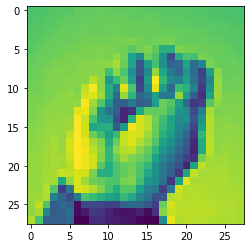

In [11]:
checkValidity(ind=399,x_test=test_data,y_test=test_label,model=cModel)

In [0]:
preds = cModel.evaluate(x=test_data,y=test_labels)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

7172/7172 [==============================] - 4s 537us/step
Loss = 0.017028458998863193
Test Accuracy = 0.9933362603187561


In [0]:
test_data.shape

(7172, 28, 28, 1)

In [0]:
pred_arr = []
orig_label_arr = []
for i in range(0, len(test_data)):
  orig_label_arr.append(num2alpha[test_label[i]])
  num2alpha = {
    0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G", 7: "H", 8: "I", 10: "K", 11: "L", 12: "M", 13: "N",
    14: "O", 15: "P", 16: "Q", 17: "R", 18: "S", 19: "T", 20: "U", 21: "V", 22: "W", 23: "X", 24: "Y"
  }
  num2alpha_mod = {
    0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G", 7: "H", 8: "I", 9: "K", 10: "L", 11: "M", 12: "N",
    13: "O", 14: "P", 15: "Q", 16: "R", 17: "S", 18: "T", 19: "U", 20: "V", 21: "W", 22: "X", 23: "Y"
  }
  #model.predict(np.expand_dims(x_test[ind],axis=0))
  out = cModel.predict(np.expand_dims(test_data[i],axis=0))
  out=(out.reshape(24,))
  out=list(out)
  max_value = max(out)
  max_index = out.index(max_value)
  pred = num2alpha_mod[max_index]
  pred_arr.append(pred)

In [0]:
len(orig_label_arr)

In [0]:
pred_arr[20:30]

['C', 'A', 'R', 'E', 'K', 'P', 'C', 'P', 'H', 'B']

In [0]:
orig_label_arr[20:30]

['C', 'A', 'V', 'E', 'K', 'P', 'C', 'P', 'H', 'B']

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def showConfusionMatrix():
  cm_labels= np.array(["A",  "B",  "C",  "D",  "E",  "F",  "G",  "H",  "I",  "K", "L",  "M", "N",  "O", "P",  "Q", "R",
       "S",  "T", "U",  "V", "W",  "X", "Y"])
  cm = confusion_matrix(orig_label_arr, pred_arr, labels=cm_labels)
  plt.figure(figsize = (15, 12))
  sns.heatmap(cm, annot=True, fmt='d', xticklabels=cm_labels, yticklabels=cm_labels)

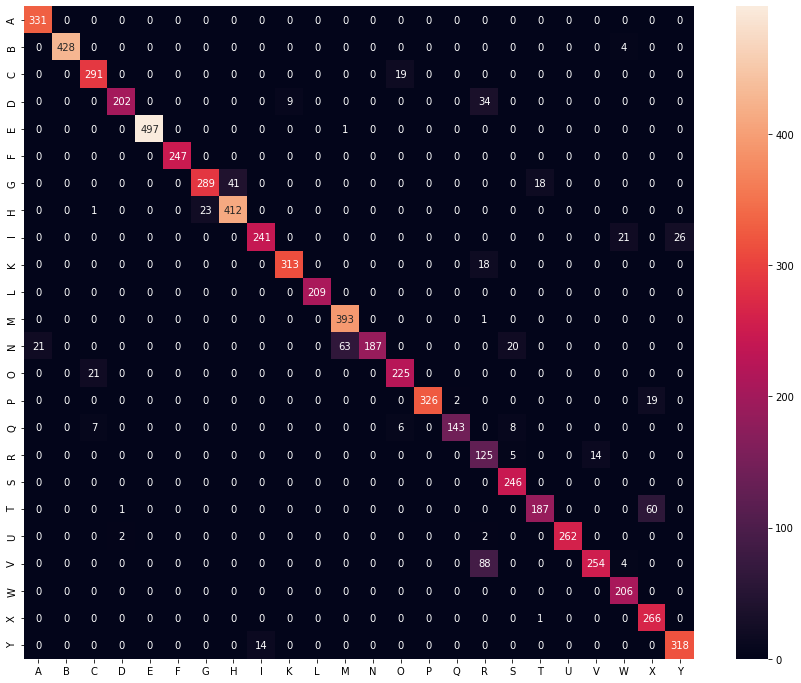

In [0]:
showConfusionMatrix()

In [0]:
matches = 0
no_matches = 0
no_matches_arr = []
for i in range(0,len(orig_label_arr)):
  if(orig_label_arr[i] == pred_arr[i]):
    matches += 1
  else:
    no_matches_arr.append(i)
    no_matches +=1

print(matches, no_matches)
print(no_matches_arr)

6598 574
[8, 22, 43, 48, 58, 74, 87, 115, 118, 139, 148, 160, 191, 193, 201, 206, 207, 209, 268, 271, 280, 288, 296, 298, 320, 326, 348, 359, 372, 389, 441, 444, 455, 456, 457, 462, 506, 527, 528, 529, 530, 532, 547, 552, 553, 564, 575, 591, 629, 668, 676, 691, 701, 715, 718, 727, 729, 753, 756, 757, 762, 772, 777, 788, 809, 825, 835, 837, 838, 848, 944, 949, 959, 960, 967, 969, 1037, 1045, 1053, 1067, 1091, 1101, 1123, 1136, 1147, 1152, 1161, 1163, 1178, 1187, 1197, 1205, 1216, 1221, 1230, 1252, 1255, 1281, 1301, 1318, 1338, 1343, 1351, 1357, 1366, 1370, 1388, 1389, 1390, 1395, 1402, 1421, 1422, 1439, 1465, 1484, 1515, 1545, 1551, 1563, 1584, 1586, 1596, 1597, 1603, 1618, 1620, 1623, 1624, 1633, 1676, 1685, 1686, 1694, 1722, 1734, 1754, 1766, 1774, 1811, 1812, 1824, 1828, 1832, 1834, 1842, 1844, 1877, 1882, 1915, 1920, 1932, 1957, 1982, 1995, 2014, 2019, 2021, 2037, 2041, 2047, 2077, 2080, 2139, 2141, 2157, 2160, 2167, 2168, 2184, 2190, 2202, 2209, 2223, 2240, 2269, 2277, 2285, 2299, 

---------------------------------------------------------

Test external image

Predicted Label = 5
Predicted Value = F


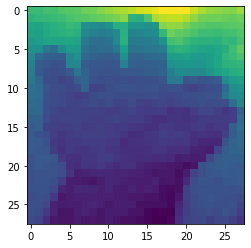

In [24]:
import cv2
img = cv2.imread('/content/sample4_croppedFromObjectDetection.jpg', cv2.IMREAD_GRAYSCALE)
im_new = cv2.resize(img, (28, 28))
plt.figure()
plt.imshow(im_new.reshape(28,28))
reg_pred = cModel.predict(np.expand_dims(im_new.reshape(28,28,1),axis=0))
reg_pred=(reg_pred.reshape(24,))
reg_pred=list(reg_pred)
cp_pred = reg_pred.copy()
cp_pred.sort()
cp_pred = cp_pred[-5:]
other1 = reg_pred.index(cp_pred[3])
other2 = reg_pred.index(cp_pred[2])
other3 = reg_pred.index(cp_pred[1])
other4 = reg_pred.index(cp_pred[0])
#print(reg_pred)
max_value = max(reg_pred)
max_index = reg_pred.index(max_value)
print("Predicted Label = " + str(max_index))
num2alpha_mod = {
    0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G", 7: "H", 8: "I", 9: "K", 10: "L", 11: "M", 12: "N",
    13: "O", 14: "P", 15: "Q", 16: "R", 17: "S", 18: "T", 19: "U", 20: "V", 21: "W", 22: "X", 23: "Y"
}
pred = num2alpha_mod[max_index]
print("Predicted Value = " + str(pred))
other1_pred = num2alpha_mod[other1]
#print("Next Possibility = " + str(other1_pred))
other2_pred = num2alpha_mod[other2]
#print("Other Possibility = " + str(other2_pred))
other3_pred = num2alpha_mod[other3]
#print("Other2 Possibility = " + str(other3_pred))
other4_pred = num2alpha_mod[other4]
#print("Other3 Possibility = " + str(other4_pred))

------------------------------------------------------------

Get Photo from Camera

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

-------------------------------------------------------------

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
out=cModel.predict(np.expand_dims(test_data[2],axis=0))

In [0]:
num2alpha = {
    0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G", 7: "H", 8: "I", 10: "K", 11: "L", 12: "M", 13: "N",
    14: "O", 15: "P", 16: "Q", 17: "R", 18: "S", 19: "T", 20: "U", 21: "V", 22: "W", 23: "X", 24: "Y"
}

print(test_label[3])
orig = num2alpha[test_label[2]]
print(orig)

10
K


In [0]:
out=(out.reshape(24,))

In [0]:
out=list(out)
print(out)

[7.878201e-13, 3.1175876e-13, 2.977306e-15, 5.5899378e-08, 3.507841e-16, 6.011878e-12, 6.1864874e-14, 4.7687146e-15, 2.8396197e-09, 0.99998105, 1.690907e-07, 2.6284125e-10, 6.921062e-10, 3.3472552e-13, 1.7901435e-09, 2.041028e-11, 1.8465253e-05, 2.1326587e-09, 2.2249551e-14, 2.6801573e-07, 2.5604596e-09, 5.664267e-10, 4.5699142e-09, 6.79985e-08]


In [0]:
max_value = max(out)
max_index = out.index(max_value)
max_index

9

In [0]:
num2alpha_mod = {
    0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G", 7: "H", 8: "I", 9: "K", 10: "L", 11: "M", 12: "N",
    13: "O", 14: "P", 15: "Q", 16: "R", 17: "S", 18: "T", 19: "U", 20: "V", 21: "W", 22: "X", 23: "Y"
}

pred = num2alpha_mod[max_index]
print(pred)

K


In [0]:
print(max_index-1)

4


In [0]:
test_data[111]

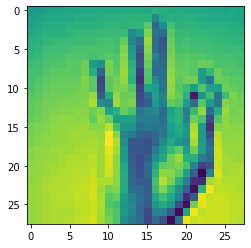

In [0]:
plt.imshow(test_data[1].reshape(28,28))#checking data

In [0]:
cModel.summary()

In [0]:
# save the model to disk
import pickle
filename = '/content/drive/My Drive/Colab Notebooks/data/SignLanguageMNIST/signLanguage_modelCNN_diffApproach.pkl'
pickle.dump(cModel, open(filename, 'wb'))